In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


# 1. Import necessary library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Read Dataset

In [ ]:
df=pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [ ]:
#head
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#tail
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


# 3. Sanity check of Data

In [ ]:
#shape
df.shape

(200, 5)

In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#finding missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#row missing percentage
df.isnull().mean(axis=1)*100

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
195    0.0
196    0.0
197    0.0
198    0.0
199    0.0
Length: 200, dtype: float64

In [ ]:
#finding duplicates
df.duplicated().sum()

0

In [ ]:
#identifying garbage values
for i in df.select_dtypes(include=object):
    print(df[i].value_counts())
    print("***"*10)

Gender
Female    112
Male       88
Name: count, dtype: int64
******************************


# 4. Exploratory Data Analysis

In [ ]:
#descriptive statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.describe(include="object")

,Gender
count,200
unique,2
top,Female
freq,112


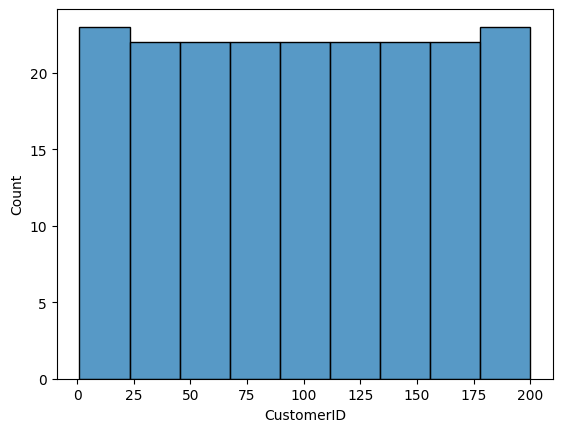

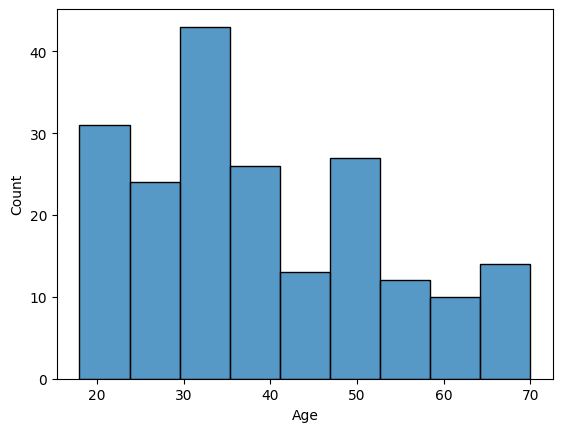

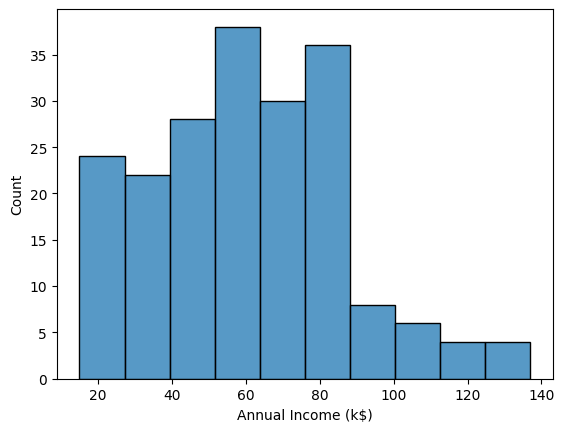

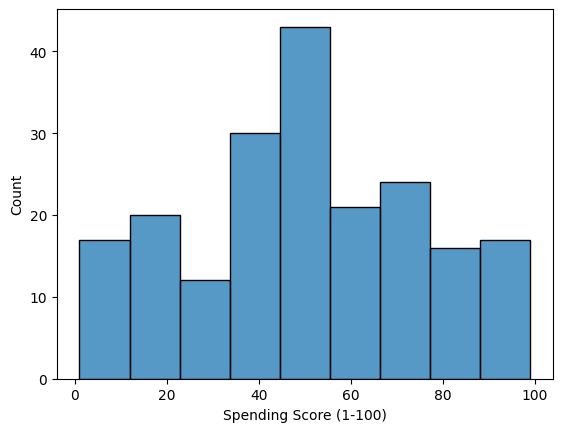

In [ ]:
import warnings
warnings.filterwarnings("ignore")


#histogram to understand the distribution
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

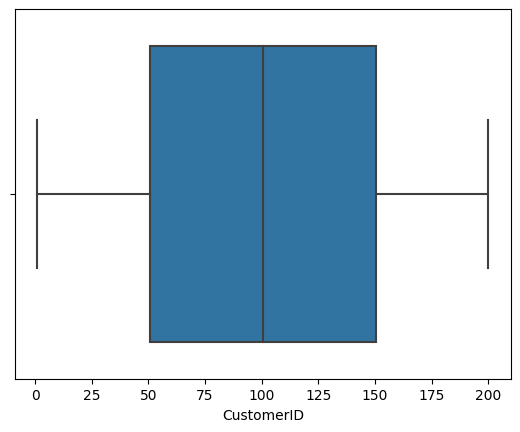

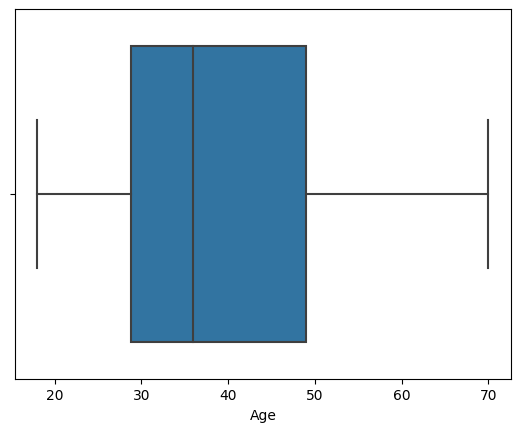

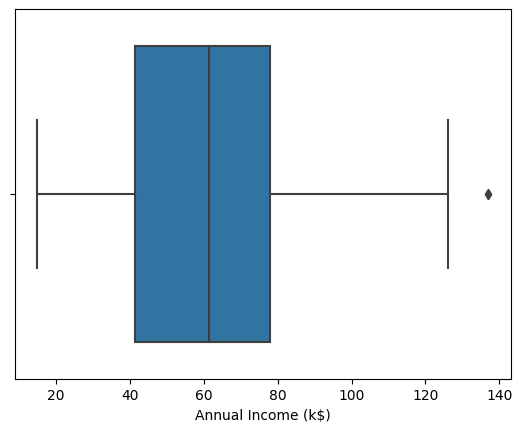

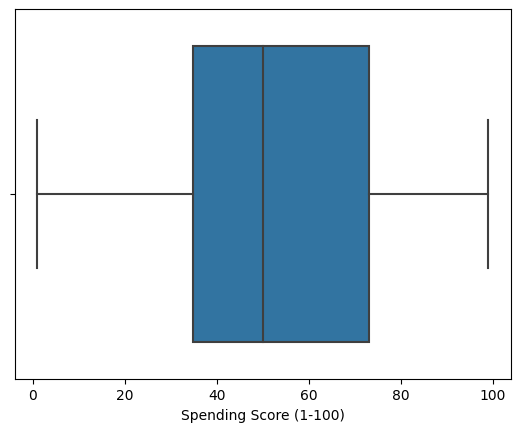

In [ ]:
#Boxplot to identify outliers
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

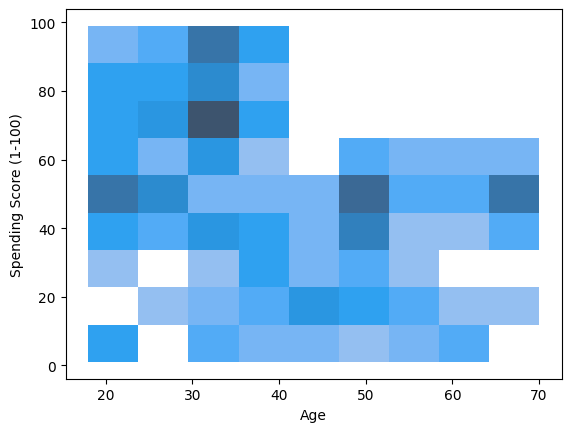

In [ ]:
#scatter plot to understand the relationship

sns.histplot(data=df,x='Age',y='Spending Score (1-100)')
plt.show()

We notice that young people are the ones who spend the most.

<Axes: >

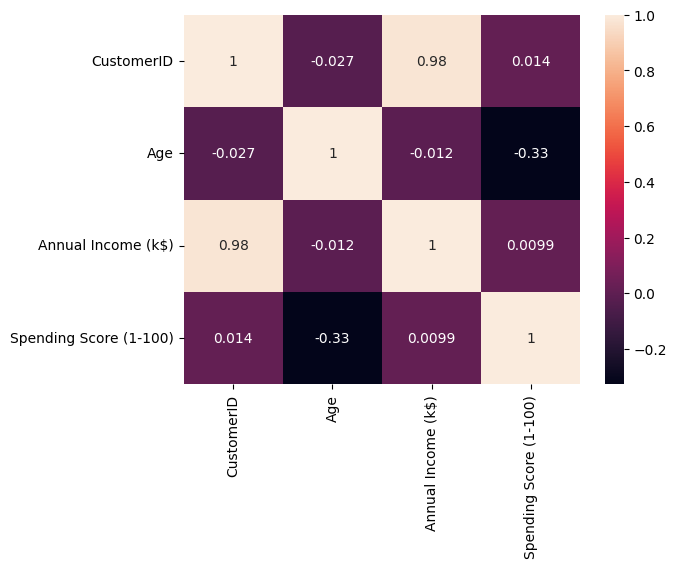

In [ ]:
#correlation with heatmap to interpret the relation and multicolliniarity
s=df.select_dtypes(include="number").corr()
sns.heatmap(s,annot=True)

-- **CustomerID**: Very strongly correlated with Annual Income (k$) (0.98)

This is normal since the ID is probably generated in ascending order of income (it's not a truly useful variable).

-- **Age**: Moderately negative correlation with Spending Score (-0.33):

Younger customers tend to have a higher spending score.

This may reflect more spending behavior among younger people.

-- **Annual Income (k$)**: No significant correlation with Spending Score and Age

This shows that income alone does not explain purchasing behavior.

-- **Spending Score (1-100)**: Negatively correlated with Age: as seen above.

Almost zero correlation with Income, which means that:

A high-income customer is not necessarily a big spender.

# 5. Outliers treatments

In [ ]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [ ]:
lw,uw = wisker(df['Annual Income (k$)'])
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']<lw,lw,df['Annual Income (k$)'])
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>uw,uw,df['Annual Income (k$)'])

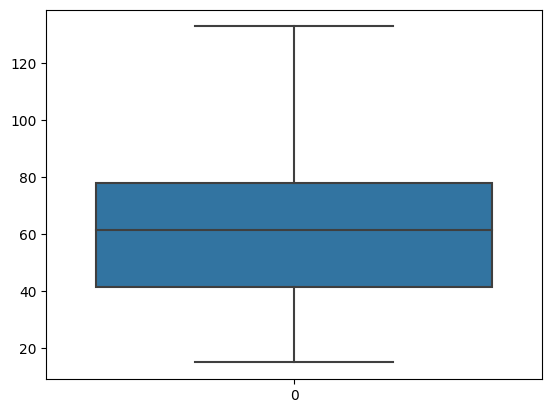

In [ ]:
sns.boxplot(df['Annual Income (k$)'])
plt.show()

# 6. Encoding of data

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Creation of label encoder
le = LabelEncoder()

# Label encoding
df['Gender_encoded'] = le.fit_transform(df['Gender'])
df = df.drop('Gender', axis=1)

In [ ]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_encoded
0,1,19,15.0,39,1
1,2,21,15.0,81,1
2,3,20,16.0,6,0
3,4,23,16.0,77,0
4,5,31,17.0,40,0


# 7. Unsupervised clustering using K-Means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#identifying the optimum number of clusters
#The Elbow method
def optimise_k_means(data,max_k):
    means=[]
    inertias=[]

    for k in range(1,max_k):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    #generate the elbow plot
    fig=plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('inertia')
    plt.grid(True)
    plt.show()

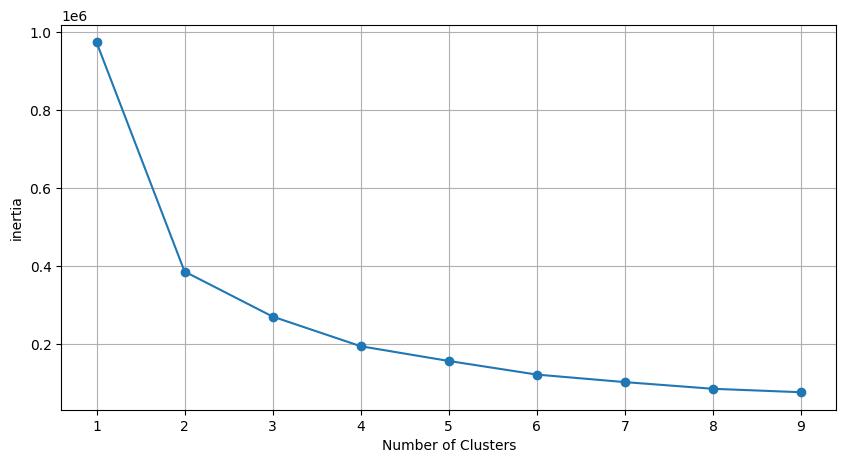

In [ ]:
optimise_k_means(df,10)

In [ ]:
#Applying KMeans Clustering
kmeans=KMeans(n_clusters=5)
kmeans.fit(df)
df['kmeans_5']=kmeans.labels_
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_encoded,kmeans_5
0,1,19,15.00,39,1,4
1,2,21,15.00,81,1,4
2,3,20,16.00,6,0,1
3,4,23,16.00,77,0,4
4,5,31,17.00,40,0,4
...,...,...,...,...,...,...
195,196,35,120.00,79,0,3
196,197,45,126.00,28,0,0
197,198,32,126.00,74,1,3
198,199,32,132.75,18,1,0


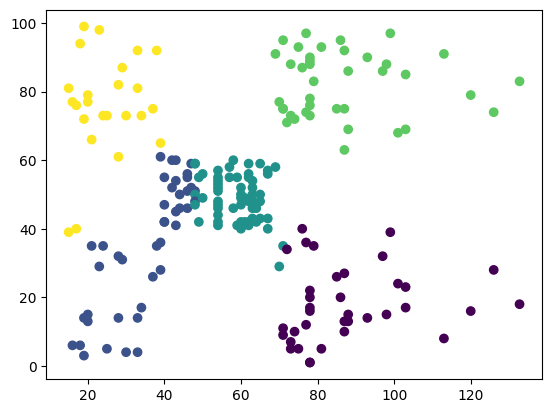

In [ ]:
#Plotting the results
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['kmeans_5'])
plt.show()


# 8. Unsupervised clustering using DBSCAN

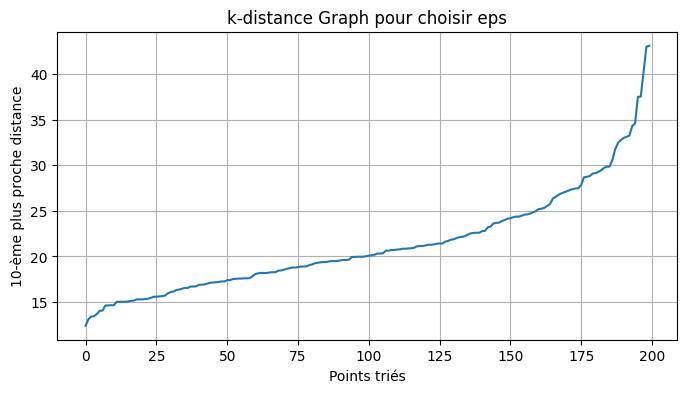

In [ ]:
#k-distance graph
from sklearn.neighbors import NearestNeighbors

# min_samples suggestion (ex: 2 * number of features)
min_samples = 10

# Fit Nearest Neighbors
neigh = NearestNeighbors(n_neighbors=min_samples)
nbrs = neigh.fit(df)

# Distances to the k-nearest neighbors
distances, indices = nbrs.kneighbors(df)

# Take the distance to the kth nearest neighbor (last column)
k_distances = distances[:, -1]
k_distances = np.sort(k_distances)

# Plot k-distance graph
plt.figure(figsize=(8,4))
plt.plot(k_distances)
plt.xlabel("Points triés")
plt.ylabel(f"{min_samples}-ème plus proche distance")
plt.title("k-distance Graph pour choisir eps")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler



dbscan = DBSCAN(eps=0.25,min_samples=10)
dbscan.fit(df_scaled)
df['DBSCAN']=dbscan.labels_
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_encoded,kmeans_5,DBSCAN
0,1,19,15.00,39,1,4,-1
1,2,21,15.00,81,1,4,-1
2,3,20,16.00,6,0,1,-1
3,4,23,16.00,77,0,4,-1
4,5,31,17.00,40,0,4,-1
...,...,...,...,...,...,...,...
195,196,35,120.00,79,0,3,-1
196,197,45,126.00,28,0,0,-1
197,198,32,126.00,74,1,3,-1
198,199,32,132.75,18,1,0,-1


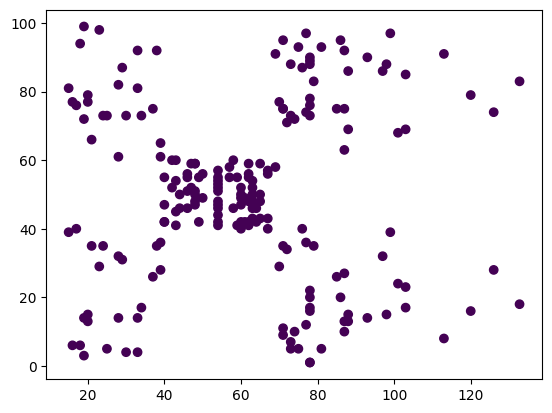

In [ ]:
#Plotting the results
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['DBSCAN'])
plt.show()

DBSCAN is simply not suitable for the current situation.

# 9. Unsupervised clustering using Agglomerative Hierarchical Clustering (AHC)

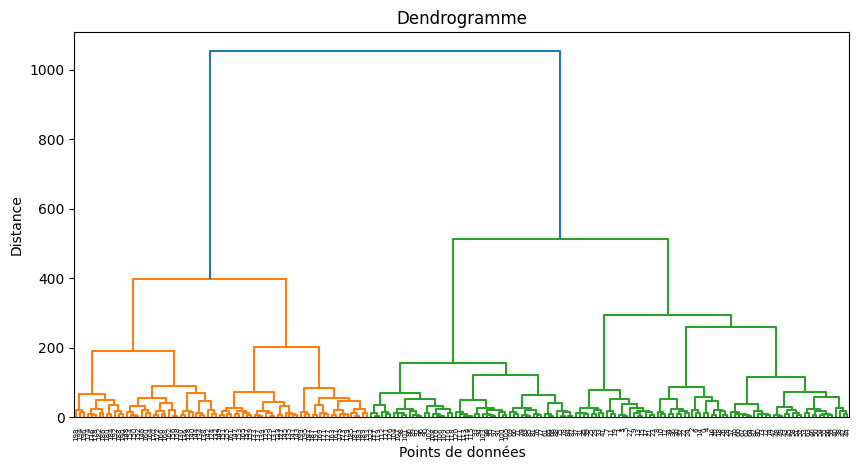

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch


# Dendrogramme
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))
plt.title("Dendrogramme")
plt.xlabel("Points de données")
plt.ylabel("Distance")
plt.show()

# Clustering hiérarchique (ex: 5 clusters)
clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels = clustering.fit_predict(df)


In [ ]:
df['AHC'] = labels
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_encoded,kmeans_5,DBSCAN,AHC
0,1,19,15.00,39,1,4,-1,0
1,2,21,15.00,81,1,4,-1,4
2,3,20,16.00,6,0,1,-1,0
3,4,23,16.00,77,0,4,-1,4
4,5,31,17.00,40,0,4,-1,0
...,...,...,...,...,...,...,...,...
195,196,35,120.00,79,0,3,-1,1
196,197,45,126.00,28,0,0,-1,3
197,198,32,126.00,74,1,3,-1,1
198,199,32,132.75,18,1,0,-1,3


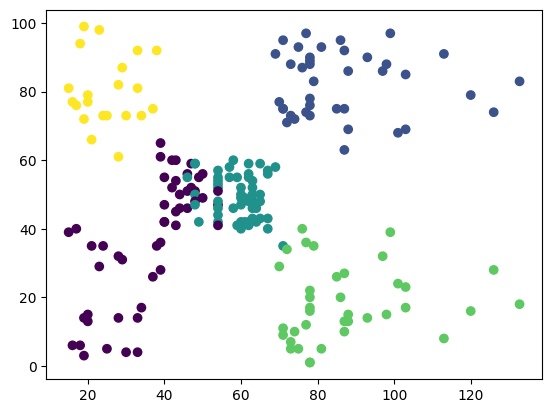

In [ ]:
#Plotting the results
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['AHC'])
plt.show()